# Note Filter Example
Import streaming EEG data into Python using **read_block**  
Filter around behavioral events that were timestamped by the user using the Run-time Notes feature in Synapse, using **epoc_filter**  
Plot each occurrence in a subplot organized by Note type  
Good for sleep scoring and behavioral discrimination

### Housekeeping

Import the tdt package and other python packages we care about

In [1]:
# magic for Jupyter
%matplotlib inline

import matplotlib.pyplot as plt  # standard Python plotting library
import numpy as np

import tdt

## Importing the Data
This example uses our [example data sets](https://www.tdt.com/files/examples/TDTExampleData.zip). To import your own data, replace `BLOCK_PATH` with the full path to your own data block.

In Synapse, you can find the block path in the database. Go to Menu --> History. Find your block, then Right-Click --> Copy path to clipboard.

In [2]:
tdt.download_demo_data()
BLOCK_PATH = 'data/Subject1-180426-120951'

demo data ready


### Set up the variables for the data you want to extract.
We will extract channel 1 from the EEG1 stream data store.

In [3]:
STORE = 'EEG1'
CHANNEL = 1
ONSET = [-3] # relative onset, in seconds, from the note timestamp

Now read the specified data from our block into a Python structure

In [4]:
data = tdt.read_block(BLOCK_PATH, channel=CHANNEL)

Found Synapse note file: data/Subject1-180426-120951\Notes.txt
read from t=0s to t=31.81s


All user notes are stored in a special epoc event called 'Note'

In [5]:
# find all the unique note values
notes, counts = np.unique(data.epocs.Note.notes, return_counts=True)

# find the highest number of occurrences (to inform our plot)
maxOccur = np.max(counts)

### Loop through the notes for plotting

Reading note: grooming
Reading note: moving
Reading note: sleep


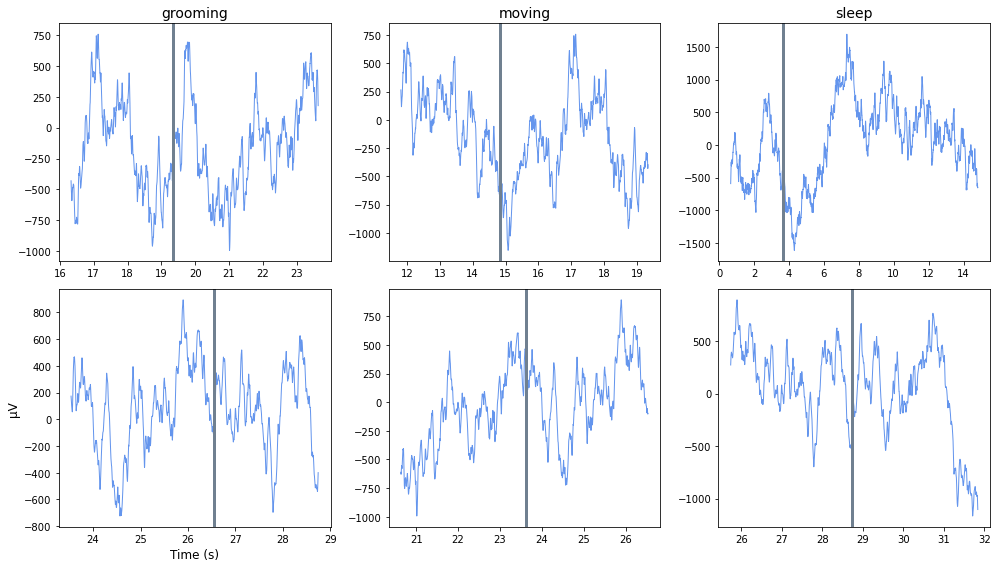

In [6]:
# some useful variables
num_notes = len(notes)
fs = data.streams[STORE].fs

fig = plt.figure(figsize=(14, 8))
for ind, note in enumerate(notes,1):
    
    print('Reading note:', note)
    
    # look at only the data around this note type
    filtered = tdt.epoc_filter(data, 'Note', values=note, t=ONSET)
    
    # for each note occurrence, plot the data from
    # the note onset to the next note onset
    n = len(filtered.streams[STORE].filtered)
    for j in range(n):
        plotInd = j * num_notes + ind
        ax = fig.add_subplot(maxOccur, num_notes, plotInd)
        
        # x-axis is the valid time ranges, in seconds
        len_wav = len(filtered.streams[STORE].filtered[j])
        ts = filtered.time_ranges[0,j] + np.linspace(1, len_wav, len_wav) / fs
        
        # plot the snippet, in microvolts
        y = np.transpose(1e6 * filtered.streams[STORE].filtered[j])
        trace1 = ax.plot(ts, y, lw=1, color='cornflowerblue')
        
        # if we specified an ONSET, draw the vertical line at the note onset
        if ONSET != 0:
            trace2 = ax.axvline(x = (ts[0]-ONSET),
                                color='slategray',
                                linewidth=3)
        
        # plot labels
        if j == 0:
            ax.set_title(note,fontsize=14)
        elif j == (n-1):
            if ind == 1:
                ax.set_ylabel('\u03BCV',fontsize=12)
                ax.set_xlabel('Time (s)',fontsize=12)

fig.tight_layout()